In [19]:
from sqlalchemy import create_engine
import pandas as pd 
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math

In [20]:
engine = create_engine('postgresql:///soccer_database')

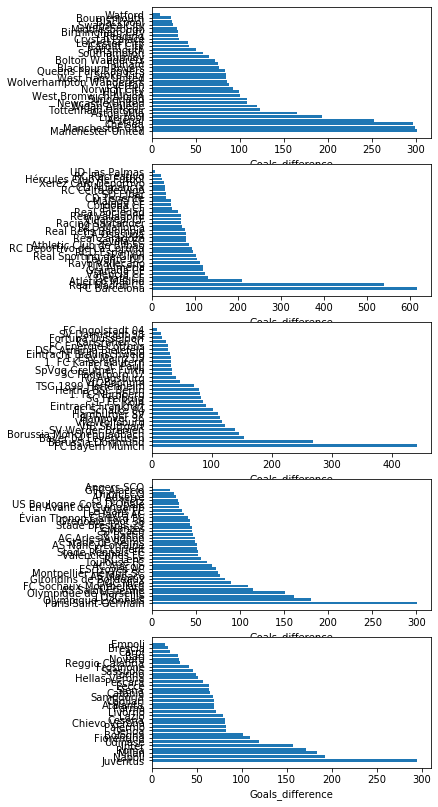

In [21]:
df_epl = pd.read_sql_query("""SELECT club, SUM(ABS(gol_dif)) AS total_goal_dif FROM team_stats 
                           WHERE league = 'England Premier League' GROUP BY club
                           ORDER BY total_goal_dif DESC;""", engine)
df_laliga = pd.read_sql_query("""SELECT club, SUM(ABS(gol_dif)) AS total_goal_dif FROM team_stats 
                           WHERE league = 'Spain LIGA BBVA' GROUP BY club
                           ORDER BY total_goal_dif DESC;""", engine)

df_germany = pd.read_sql_query("""SELECT club, SUM(ABS(gol_dif)) AS total_goal_dif FROM team_stats 
                           WHERE league = 'Germany 1. Bundesliga' GROUP BY club
                           ORDER BY total_goal_dif DESC;""", engine)
df_france = pd.read_sql_query("""SELECT club, SUM(ABS(gol_dif)) AS total_goal_dif FROM team_stats 
                           WHERE league = 'France Ligue 1' GROUP BY club
                           ORDER BY total_goal_dif DESC;""", engine)
df_italy = pd.read_sql_query("""SELECT club, SUM(ABS(gol_dif)) AS total_goal_dif FROM team_stats 
                           WHERE league = 'Italy Serie A' GROUP BY club
                           ORDER BY total_goal_dif DESC;""", engine)

fig, axs = plt.subplots(5, 1, gridspec_kw={'wspace': 2}, figsize=(5, 14))
(ax1, ax2, ax3, ax4, ax5) = axs
ax1.barh(df_epl['club'], df_epl['total_goal_dif'])
ax1.set_label('EPL')
ax2.barh(df_laliga['club'], df_laliga['total_goal_dif'])
ax3.barh(df_germany['club'], df_germany['total_goal_dif'])
ax4.barh(df_france['club'], df_france['total_goal_dif'])
ax5.barh(df_italy['club'], df_italy['total_goal_dif'])
ax1.set_xlabel('Goals_difference')
ax2.set_xlabel('Goals_difference')
ax3.set_xlabel('Goals_difference')
ax4.set_xlabel('Goals_difference')
ax5.set_xlabel('Goals_difference');

In [ ]:
#H0 = League does not have any affect on total goal differential of that league.
#H1 = Total goal differential will vary by league.

epl_abs_goaldiff = np.absolute(df_epl['total_goal_dif'])
epl_abs_goaldiff.describe()

laliga_abs_goaldiff = np.absolute(df_laliga['total_goal_dif'])
laliga_abs_goaldiff.describe()

fig, axs = plt.subplots(1, 2, gridspec_kw={'wspace': 2}, figsize=(10, 4))
(ax1, ax2) = axs
ax1.barh(df_epl['club'], epl_abs_goaldiff)
ax2.barh(df_laliga['club'], laliga_abs_goaldiff)
ax1.set_xlabel('Abs goals difference')
ax2.set_xlabel('Abs goals difference');

import seaborn as sns

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


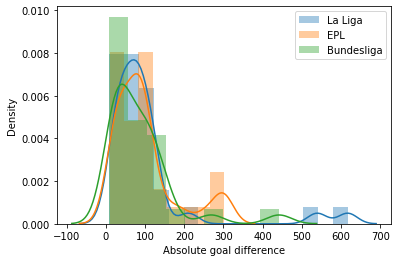

In [25]:
sns.distplot(df_laliga['total_goal_dif'], label='La Liga')
sns.distplot(df_epl['total_goal_dif'], label='EPL')
sns.distplot(df_germany['total_goal_dif'], label='Bundesliga')
plt.legend()
plt.xlabel('Absolute goal difference')
plt.ylabel('Density');

In [27]:
#we are running a two-tail t-test
# signficant threshold (alpha) 0.01
alpha = 0.005

laliga_mean = df_laliga['total_goal_dif'].mean()

epl_mean = df_epl['total_goal_dif'].mean()

#german_mean = df_german['total_goal_dif'].mean()

laliga_std = df_laliga['total_goal_dif'].std()

n = len(df_laliga['total_goal_dif'])

df = n-1

In [48]:
def goal_dif_t_test(alpha, df_league):
    epl_mean = df_epl['total_goal_dif'].mean()
    n = len(df_league['total_goal_dif'])
    df = n-1
    t_critical = stats.t.ppf(1-alpha, df)
    league_epl_ttest = stats.ttest_1samp(a= df_league['total_goal_dif'], popmean= epl_mean)
    t_value = league_epl_ttest[0]
    p_value = league_epl_ttest[1]
    return (f"""T-Critical = {t_critical}, T-Value = {t_value}, P-Value = {p_value}""")

In [49]:
goal_dif_t_test(0.005, df_germany)

'T-Critical = 2.756385903670335, T-Value = -0.7623726426113742, P-Value = 0.4519942789078758'

In [41]:
t_critical = stats.t.ppf(1-alpha, df)
t_critical

2.738481482012083

In [42]:
laliga_epl_ttest = stats.ttest_1samp(a= df_laliga['total_goal_dif'], popmean= epl_mean)

In [43]:
t_value = laliga_epl_ttest[0]
p_value = laliga_epl_ttest[1]
p_value

0.7963441577024469

In [45]:
if abs(t_value) > t_critical and p_value < alpha:
    print('Reject null hypthesis')
if abs(t_value) < t_critical:
    print('Dont reject null hypothesis')

Dont reject null hypothesis


In [ ]:
## We conclude there is NO significant effect on goal differential due to league

In [47]:
df_germany.columns

Index(['club', 'total_goal_dif'], dtype='object')